In [1]:
import pandas as pd
import statsmodels.api as sm

# Homework 1 

## Idalee Vargas

# 1.) Import Data from FRED

In [2]:
data = pd.read_csv("TaylorRuleData.csv", index_col = 0)
data.dropna(inplace = True)

In [3]:
data.index = pd.to_datetime(data.index)

# 2.) Do Not Randomize, split your data into Train, Test Holdout

In [4]:
split_1 = int(len(data) * .6)
split_2 = int(len(data) * .9)
data_in = data[:split_1]
data_out = data[split_1:split_2]
data_hold = data[split_2:]

In [5]:
X_in = data_in.iloc[:,1:]
y_in = data_in.iloc[:,0]
X_out = data_out.iloc[:,1:]
y_out = data_out.iloc[:,0]
X_hold = data_hold.iloc[:,1:]
y_hold = data_hold.iloc[:,0]

In [6]:
# Add Constants
X_in = sm.add_constant(X_in)
X_out = sm.add_constant(X_out) 
X_hold = sm.add_constant(X_hold)

# 3.) Build a model that regresses FF~Unemp, HousingStarts, Inflation

In [7]:
model1 = sm.OLS(y_in, X_in).fit()

# 4.) Recreate the graph fro your model

In [8]:
import matplotlib.pyplot as plt

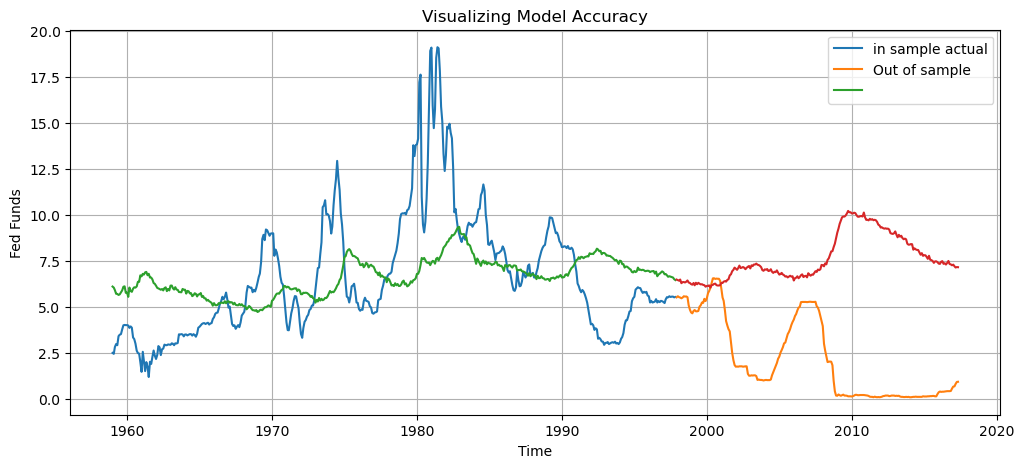

In [9]:
plt.figure(figsize = (12,5))

###
plt.plot(y_in)
plt.plot(y_out)
plt.plot(model1.predict(X_in))
plt.plot(model1.predict(X_out))

###

plt.ylabel("Fed Funds")
plt.xlabel("Time")
plt.title("Visualizing Model Accuracy")
plt.legend(["in sample actual", "Out of sample", ""])
plt.grid()
plt.show()

## "All Models are wrong but some are useful" - 1976 George Box

# 5.) What are the in/out of sample MSEs

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out))

In [12]:
print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)

Insample MSE :  10.071422013168643
Outsample MSE :  40.3608278356685


# 6.) Using a for loop. Repeat 3,4,5 for polynomial degrees 1,2,3

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [14]:
max_degrees = 3

Degrees:  1


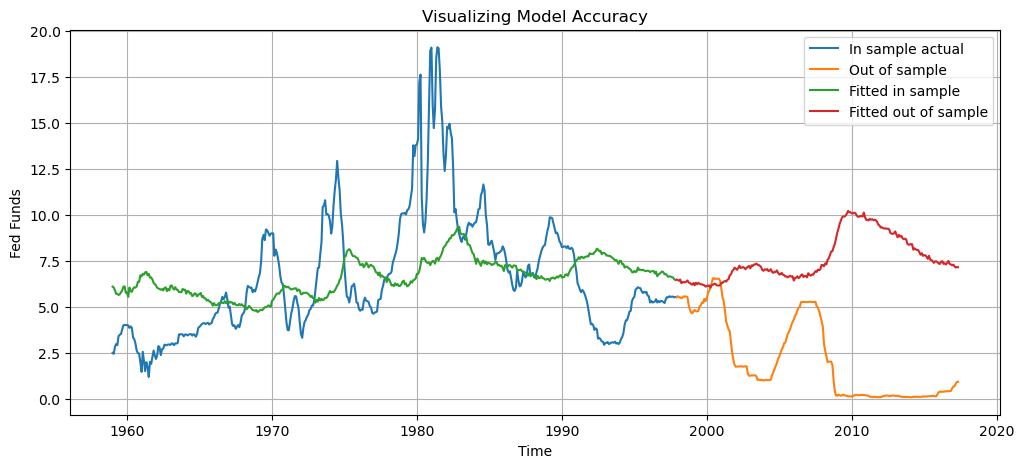

Degrees:  2


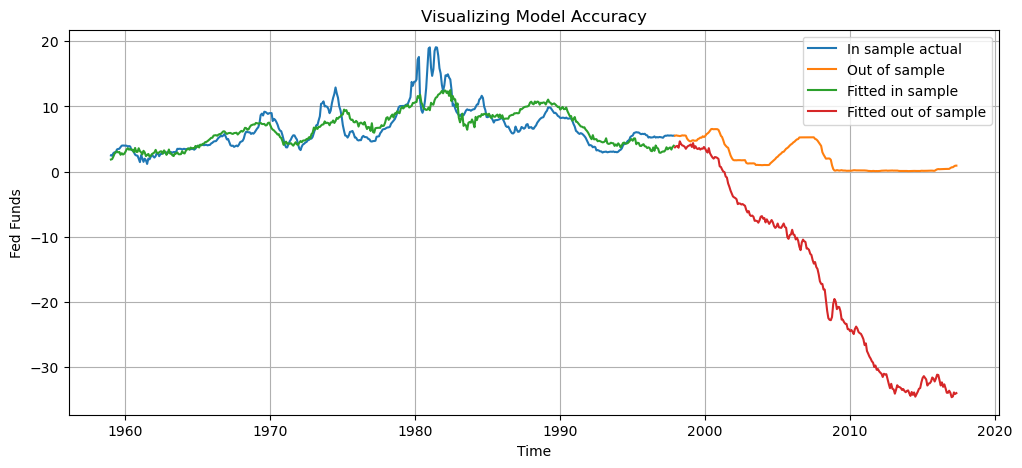

Degrees:  3


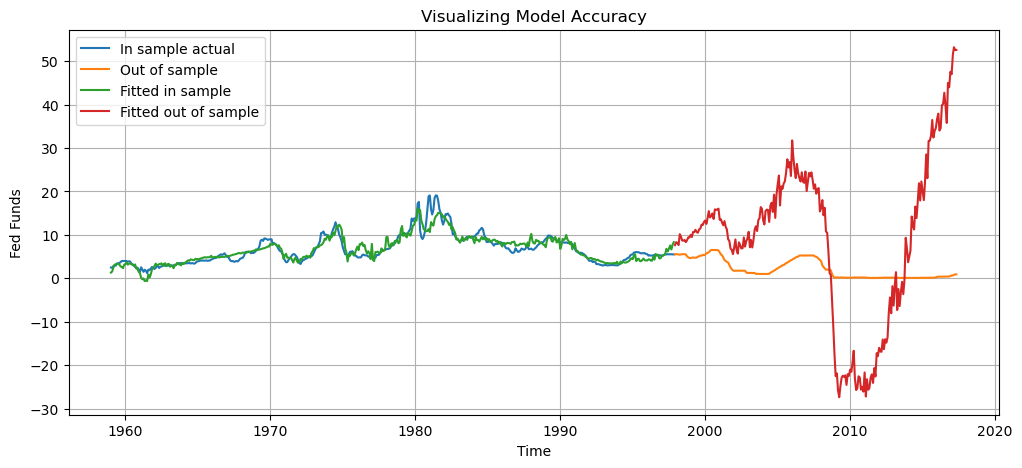

Insample MSE :  1.8723636288250916
Outsample MSE :  371.7672642959744
_____________


In [15]:
for degrees in range(1,1+max_degrees):
    print("Degrees: ", degrees)
    poly = PolynomialFeatures(degree = degrees)
    X_in_poly = poly.fit_transform(X_in)
    X_out_poly = poly.transform(X_out)
    
# Q3
    model1 = sm.OLS(y_in, X_in_poly).fit()
    
#Q4

    plt.figure(figsize = (12,5))
    
    in_preds = model1.predict(X_in_poly)
    in_preds = pd.DataFrame(in_preds, index = y_in.index)
    out_preds = model1.predict(X_out_poly)
    out_preds = pd.DataFrame(out_preds, index = y_out.index)
    
    plt.plot(y_in)
    plt.plot(y_out)
    plt.plot(in_preds)
    plt.plot(out_preds)

###

    plt.ylabel("Fed Funds")
    plt.xlabel("Time")
    plt.title("Visualizing Model Accuracy")
    plt.legend(["In sample actual", "Out of sample", "Fitted in sample", "Fitted out of sample"])
    plt.grid()
    plt.show()
    
## Q5
in_mse_1 = mean_squared_error(y_in, model1.predict(X_in_poly))
out_mse_1 = mean_squared_error(y_out, model1.predict(X_out_poly))

print("Insample MSE : ", in_mse_1)
print("Outsample MSE : ", out_mse_1)
print("_____________")

# 7.) State your observations :

For linear regression, there's a tradeoff between bias and variance happening in each model. As the degree of the regression increases, the tradeoff between both also increases. 

The first presented model, there's a high bias that can be seen with a high Mean Square Error and the predictions are not closely to the real data. Hence, it can be assumed that the model is under-fitting the real data, therefore is oversimplified. 

The second degree model is more accurate than the first degree model. As the general trends from the actual data move closely to the fitted data from the predictions. The out-sample RMSE increase implies a increase in variance. Hence, while the bias has decreased the variance and the complexity of the model increased a little. 

In the thrid degree model, the data in the actual sample is almost the same as the predicted value. Hence, it shows a high degree of predictability. However, the out of sample data is still really volatil and differs from the predictions. So there's presence of variance. This model shows over-fitting.